In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measure = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
#getting tables columns using the inspector function
inspector = inspect(engine) 
inspector.get_table_names()

['measurement', 'station']

In [11]:

Columns = inspector.get_columns('measurement')
for column in Columns:
    print(column)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [93]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#pulling data from session
fartherst_date = session.query(Measure.date).order_by(Measure.date.desc()).first()

#calculating latest date in the data farme 
latest_date = fartherst_date[0]
one_year_back = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_back

datetime.datetime(2016, 8, 23, 0, 0)

In [94]:
# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
last_12months = session.query(Measure.date, Measure.prcp).filter(Measure.date > one_year_back).all()
last_12months

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

Text(0.5, 0, 'Date')

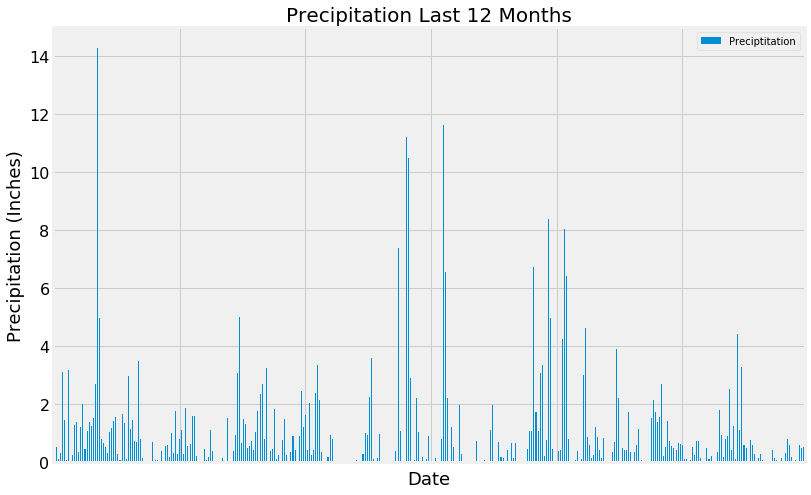

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12months, columns = ["Date","Preciptitation"])

# Sort the dataframe by date
grouped_date = df.groupby(["Date"]).sum()

# Use Pandas Plotting with Matplotlib to plot the data
multi_plot = grouped_date.plot(kind="bar", figsize=(12,8))
plt.locator_params(axis='x', nbins=6)
multi_plot.xaxis.set_major_formatter(plt.NullFormatter())
multi_plot.tick_params(axis='y', labelsize=16)
multi_plot.grid(True)
plt.title("Precipitation Last 12 Months", size=20)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=18)

In [55]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df["Preciptitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Preciptitation, dtype: float64

In [96]:
# Design a query to show how many stations are available in this dataset?
station_count  = session.query(func.count(Station.name)).all()

print(f"The total station count is {station_count[0][0]}")

The total station count is 9


In [110]:
# What are the most active stations? (i.e. what stations have the most rows)?
station = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
        order_by(func.count(Measure.station).desc()).limit(3).all()

station

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709)]

In [63]:
# List the stations and the counts in descending order.
station = session.query(Measure.station, func.count(Measure.station)).group_by(Measure.station).\
        order_by(func.count(Measure.station).desc()).all()
counter = 0
for stat,count in station:
    print (f"The station is {station[counter][0]} and the count is {station[counter][1]}")
    counter = counter + 1 

The station is USC00519281 and the count is 2772
The station is USC00519397 and the count is 2724
The station is USC00513117 and the count is 2709
The station is USC00519523 and the count is 2669
The station is USC00516128 and the count is 2612
The station is USC00514830 and the count is 2202
The station is USC00511918 and the count is 1979
The station is USC00517948 and the count is 1372
The station is USC00518838 and the count is 511


In [68]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
USC00519281_lowest_temp = session.query(func.min(Measure.prcp)).filter(Measure.station == 'USC00519281').all()
print(f" The lowest temperature recorded for USC00519281 was {USC00519281_lowest_temp[0][0]}")

 The lowest temperature recorded for USC00519281 was 0.0


In [69]:
# highest temperature recorded, and average temperature of the most active station?
USC00519281_highest_temp = session.query(func.max(Measure.prcp)).filter(Measure.station == 'USC00519281').all()

print(f" The highest temperature recorded for USC00519281 was {USC00519281_highest_temp[0][0]}")

 The highest temperature recorded for USC00519281 was 9.64


In [53]:
#average temperature of the most active station?
USC00519281_avg_temp = session.query(func.avg(Measure.prcp)).filter(Measure.station == 'USC00519281').all()

print(f'The average temperature of the most active station is {USC00519281_avg_temp[0][0]}')

The average temperature of the most active station is 0.2123520923520915


In [92]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
highest_obs_station = session.query(Measure.station,func.count(Measure.tobs)).group_by(Measure.station).\
                        order_by(func.count(Measure.tobs).desc()).all()
highest_obs_station = highest_obs_station[0][0]
print(f" The station with the highest number of temperature observations {highest_obs_station}")

 The station with the highest number of temperature observations USC00519281


Text(0, 0.5, 'Number of Recorded Observations')

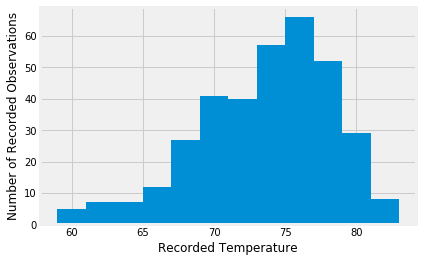

In [90]:
#pulling data from session
fartherst_date = session.query(Measure.date).order_by(Measure.date.desc()).first()

#calculating latest date in the data farme 
latest_date = fartherst_date[0]
one_year_back = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
one_year_back

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores
last_12months = session.query(Measure.station, Measure.tobs).filter(Measure.station == highest_obs_station).\
                filter(Measure.date > one_year_back).all()
last_12months

# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(last_12months, columns = ["Station","Temp observed"])

#Sort the dataframe by date
#getting station with highest number of observations
df["Station"].value_counts()

USC00519397_df = df.loc[(df["Station"]  == "USC00519397"), :]
data = df["Temp observed"]
#multi_plot = USC00519397_df["Temp observed"].value_counts().plot(kind="bar", figsize=(12,8))
plt.hist(data, bins = 12)
plt.xlabel("Recorded Temperature")
plt.ylabel("Number of Recorded Observations")